<a href="https://colab.research.google.com/github/kannal17/Time-Series-and-Analysis/blob/main/tsa_exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement Program For Visualization OF Time Series
Data , give python code for this project with the data set  

Here is all the data you need:
"Plant_1_Generation_Data.csv"

## Data loading

### Subtask:
Load the "Plant_1_Generation_Data.csv" file into a Pandas DataFrame.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame.



In [ ]:
import pandas as pd

df = pd.read_csv('Plant_1_Generation_Data.csv')
display(df.head())

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


## Data exploration

### Subtask:
Explore the loaded DataFrame to understand the data structure.


**Reasoning**:
Explore the DataFrame to understand its structure by checking the shape, column names, data types, missing values, and statistical summary.



In [ ]:
print("DataFrame Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nDataFrame Info:")
df.info()
print("\nDescriptive Statistics:")
display(df.describe())
print("\nMissing Values per Column:")
print(df.isnull().sum())

DataFrame Shape: (68778, 7)

Column Names: ['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB

Descriptive Statistics:


,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06



Missing Values per Column:
DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64


## Data wrangling

### Subtask:
Convert the 'DATE_TIME' column to a datetime object and set it as the DataFrame index.


**Reasoning**:
Convert the 'DATE_TIME' column to a datetime object and set it as the index.



In [ ]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df = df.set_index('DATE_TIME')
print(df.index)

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               '2020-05-15 00:00:00', '2020-05-15 00:00:00',
               ...
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00',
               '2020-06-17 23:45:00', '2020-06-17 23:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=68778, freq=None)


<ipython-input-3-71ea9f409c75>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])


**Reasoning**:
The previous command has a warning about parsing dates. We need to specify `dayfirst=True` to correctly parse the dates. Also, we need to verify that the index is sorted chronologically.



In [ ]:
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], dayfirst=True)
df = df.set_index('DATE_TIME')
print(df.index.is_monotonic_increasing)

KeyError: 'DATE_TIME'

**Reasoning**:
We need to fix the error from the previous command. The error is caused because we have already set the 'DATE_TIME' column as the index, so we don't need to access it using `df['DATE_TIME']`. We can directly use `df.index` to check if it's sorted and whether the index is of datetime type.



In [ ]:
print(df.index.is_monotonic_increasing)
print(type(df.index))

True
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


## Data visualization

### Subtask:
Visualize the 'DC_POWER' column over time.


**Reasoning**:
Import matplotlib.pyplot and create a line plot of 'DC_POWER' over time.



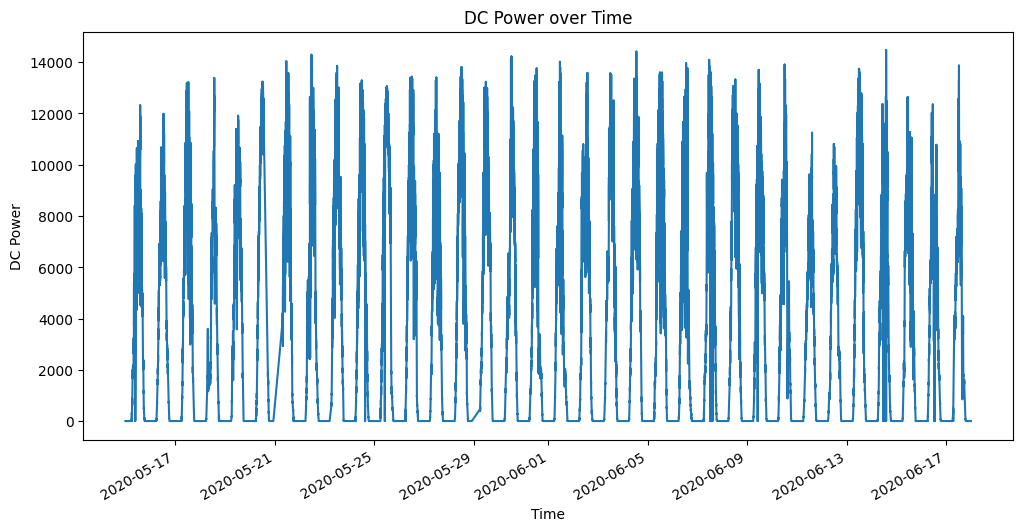

In [ ]:
import matplotlib.pyplot as plt

df['DC_POWER'].plot(figsize=(12, 6))
plt.xlabel('Time')
plt.ylabel('DC Power')
plt.title('DC Power over Time')
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided task description.


### 2. Data Analysis Key Findings

* The dataset contains 68778 rows and 7 columns. (Shape)
* The 'DATE_TIME' column was successfully converted to datetime objects and set as the index, allowing for time-based analysis.
* There were no missing values found in the dataset.
* A line plot of 'DC_POWER' over time was generated, providing a visual representation of the DC power output.


### 3. Insights or Next Steps

* **Investigate trends and seasonality:** Analyze the 'DC_POWER' and other relevant columns (e.g., 'AC_POWER', 'DAILY_YIELD') to identify patterns over time, such as daily, weekly, or seasonal variations.
* **Explore correlations:** Analyze the correlation between different variables (e.g., 'DC_POWER' and 'AC_POWER') to understand the relationship between different aspects of the plant's generation.
